# Introduction

### We begin with a simple definition of time series: 
* A time series is a sequence of data points that occur in successive order over some period of time.

#### Therefore, the data is organized by relatively deterministic timestamps, and may, compared to random sample data, contain additional information that we can extract.

### Let's import some libraries.

In [1]:
import warnings                                  # do not disturbe mode
warnings.filterwarnings('ignore')

In [4]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
%matplotlib inline

In [5]:
from itertools import product                    # some useful functions

### Let's look at real mobile game data. Specifically, we will look into ads watched per hour and in-game currency spend per day:

In [6]:
ads = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'])
currency = pd.read_csv('currency.csv', index_col=['Time'], parse_dates=['Time'])

In [8]:
ads.head()

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


In [9]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2017-09-13 00:00:00 to 2017-09-21 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ads     216 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [10]:
ads.isnull().sum()

Ads    0
dtype: int64

In [11]:
currency.head()

,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775


In [12]:
currency.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2017-05-01 to 2018-02-24
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   GEMS_GEMS_SPENT  300 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [13]:
currency.isnull().sum()

GEMS_GEMS_SPENT    0
dtype: int64

In [15]:
print('Size of Ads:',ads.size)
print('Size of Currency:',currency.size)

Size of Ads: 216
Size of Currency: 300


In [16]:
print('Shape of Ads:',ads.shape)
print('Shape of Currency:',currency.shape)

Shape of Ads: (216, 1)
Shape of Currency: (300, 1)


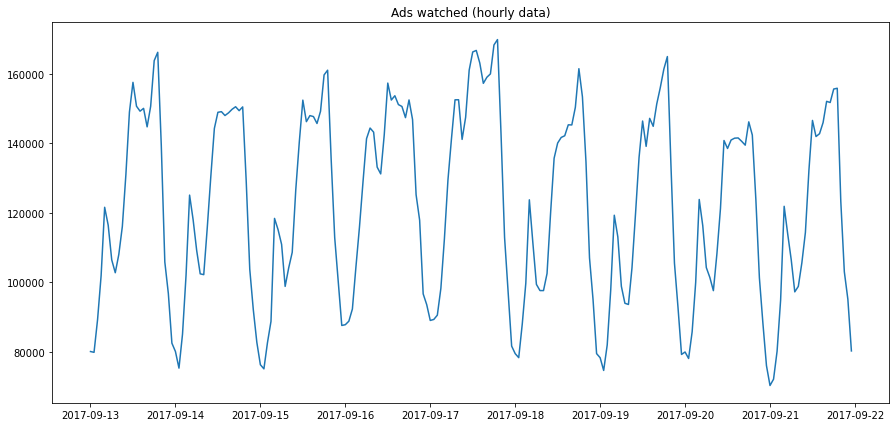

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(ads.Ads)
plt.title('Ads watched (hourly data)')
plt.show()

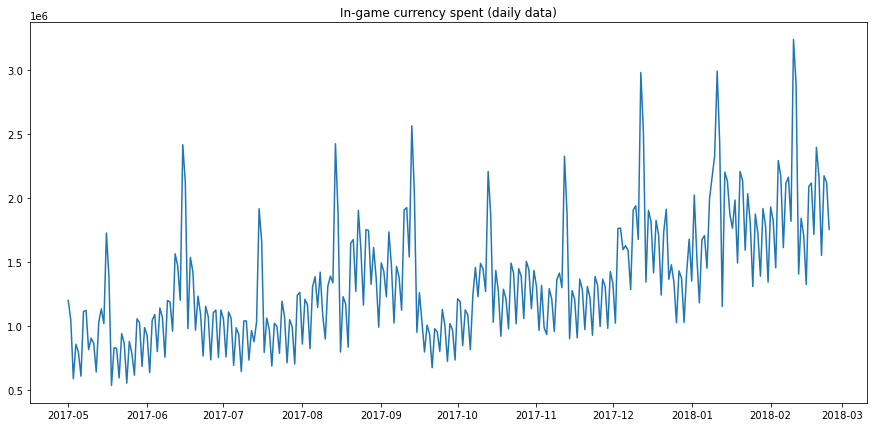

In [18]:
plt.figure(figsize=(15, 7))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title('In-game currency spent (daily data)')
plt.show()

### Forecast quality metrics

#### Before we begin forecasting, let's understand how to measure the quality of our predictions and take a look at the most commonly used metrics.

#### 1. R Squared
- R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

#### 2. Mean Absolute Error 
- Mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.

#### 3. Median Abolute Error
- The median absolute error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.

#### 4. Mean Squared Error
- Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

#### 5. Mean Squared Logarithmic Error
- It is the Root Mean Squared Error of the log-transformed predicted and log-transformed actual values.

In [20]:
def mean_absolute_percentage_error(y_test, y_pred): 
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [19]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

#### start with a naive hypothesis: "tomorrow will be the same as today". However, instead of a model like  y^t=yt−1, we will assume that the future value of our variable depends on the average of its  k  previous values. Therefore, we will use the last_observed_average.

In [24]:
def last_observed_average(series, n):
    return np.average(series[-n:])

In [25]:
last_observed_average(ads, 24) # prediction for the last observed day (past 24 hours)

116805.0

In [26]:
last_observed_average(currency, 24) # prediction for the last observed day (past 24 hours)

1996212.9166666667

### Next step, we need the previous values to be actually observed.

#### Let's smooth by the previous 4 hours.

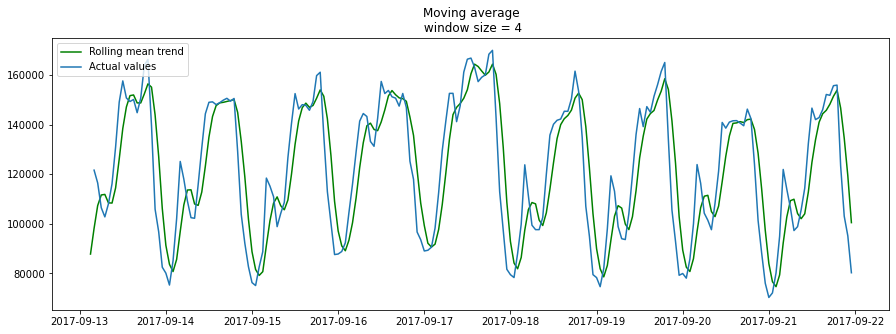

In [40]:
rolling_mean = ads.rolling(window=4).mean()

plt.figure(figsize=(15,5))
plt.title("Moving average\n window size = {}".format(4))
plt.plot(rolling_mean, "g", label="Rolling mean trend")
plt.plot(ads[4:], label="Actual values")
plt.legend(loc="upper left")

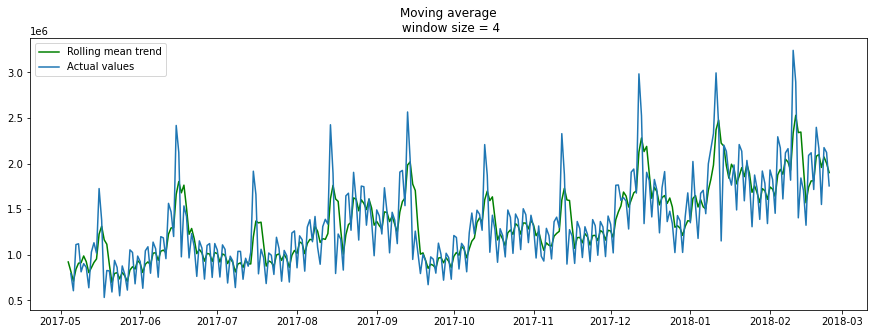

In [41]:
rolling_mean = currency.rolling(window=4).mean()

plt.figure(figsize=(15,5))
plt.title("Moving average\n window size = {}".format(4))
plt.plot(rolling_mean, "g", label="Rolling mean trend")
plt.plot(currency[4:], label="Actual values")
plt.legend(loc="upper left")

#### Let's smooth by the previous 12 hours.

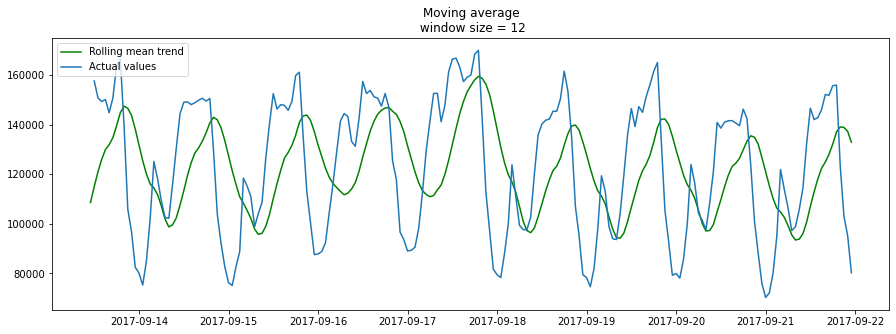

In [42]:
rolling_mean = ads.rolling(window=12).mean()

plt.figure(figsize=(15,5))
plt.title("Moving average\n window size = {}".format(12))
plt.plot(rolling_mean, "g", label="Rolling mean trend")
plt.plot(ads[12:], label="Actual values")
plt.legend(loc="upper left")

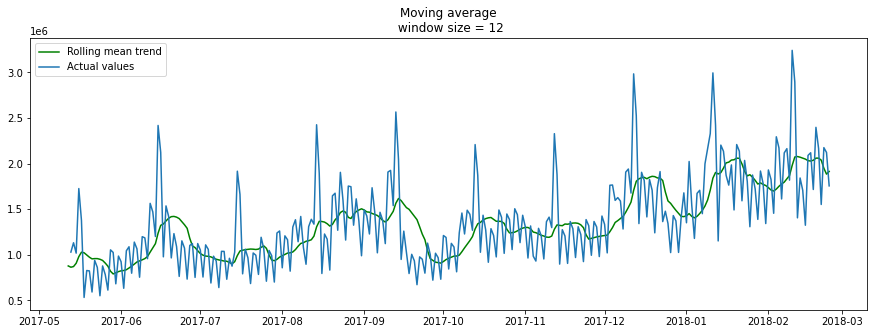

In [43]:
rolling_mean = currency.rolling(window=12).mean()

plt.figure(figsize=(15,5))
plt.title("Moving average\n window size = {}".format(12))
plt.plot(rolling_mean, "g", label="Rolling mean trend")
plt.plot(currency[12:], label="Actual values")
plt.legend(loc="upper left")

#### Let's smooth by the previous 24 hours.

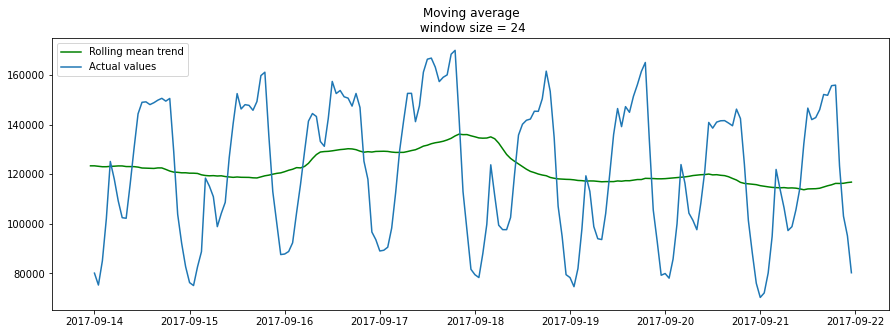

In [44]:
rolling_mean = ads.rolling(window=24).mean()

plt.figure(figsize=(15,5))
plt.title("Moving average\n window size = {}".format(24))
plt.plot(rolling_mean, "g", label="Rolling mean trend")
plt.plot(ads[24:], label="Actual values")
plt.legend(loc="upper left")

* When we applied daily smoothing on hourly data, we could clearly see the dynamics of ads watched. During the weekends, the values are higher (more time to play on the weekends) while fewer ads are watched on weekdays.

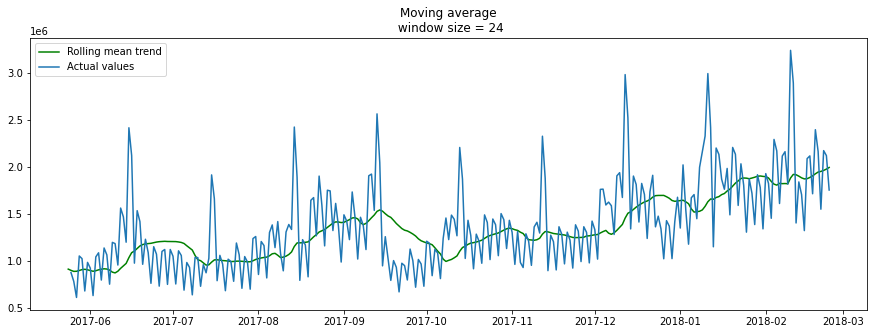

In [45]:
rolling_mean = currency.rolling(window=24).mean()

plt.figure(figsize=(15,5))
plt.title("Moving average\n window size = {}".format(24))
plt.plot(rolling_mean, "g", label="Rolling mean trend")
plt.plot(currency[24:], label="Actual values")
plt.legend(loc="upper left")

### We can also plot confidence intervals for our smoothed values.

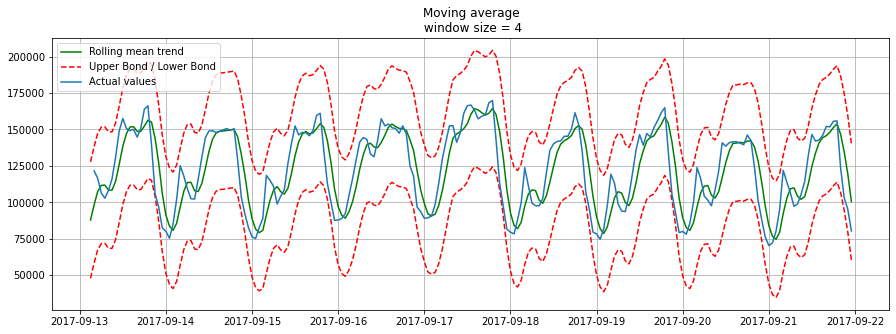

In [54]:
scale = 1.96
rolling_mean = ads.rolling(window=4).mean()
plt.figure(figsize=(15,5))
plt.title("Moving average\n window size = {}".format(4))
plt.plot(rolling_mean, "g", label="Rolling mean trend")
mae = mean_absolute_error(ads[4:], rolling_mean[4:])
deviation = np.std(ads[4:] - rolling_mean[4:])
lower_bond = rolling_mean - (mae + scale * deviation)
upper_bond = rolling_mean + (mae + scale * deviation)
plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
plt.plot(lower_bond, "r--")        
plt.plot(ads[4:], label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)

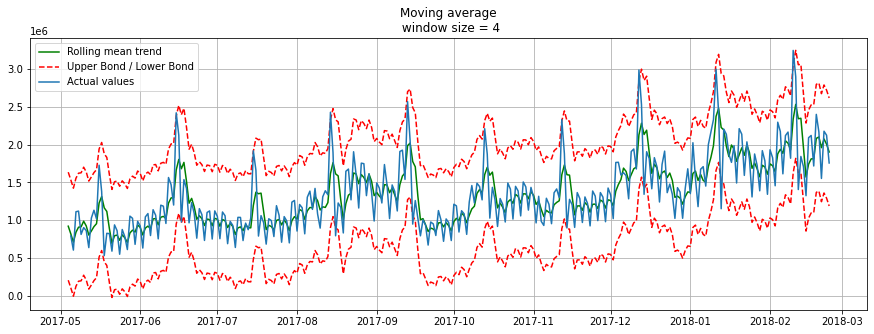

In [56]:
scale = 1.96
rolling_mean = currency.rolling(window=4).mean()
plt.figure(figsize=(15,5))
plt.title("Moving average\n window size = {}".format(4))
plt.plot(rolling_mean, "g", label="Rolling mean trend")
mae = mean_absolute_error(currency[4:], rolling_mean[4:])
deviation = np.std(currency[4:] - rolling_mean[4:])
lower_bond = rolling_mean - (mae + scale * deviation)
upper_bond = rolling_mean + (mae + scale * deviation)
plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
plt.plot(lower_bond, "r--")        
plt.plot(currency[4:], label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)

In [55]:
ads1 = ads.copy()
ads1.iloc[-20] = ads1.iloc[-20] * 0.2 # say we have 80% drop of ads 

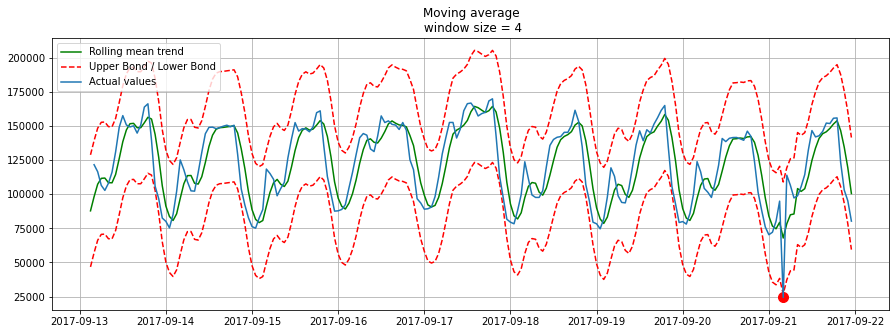

In [57]:
scale = 1.96
rolling_mean = ads1.rolling(window=4).mean()
plt.figure(figsize=(15,5))
plt.title("Moving average\n window size = {}".format(4))
plt.plot(rolling_mean, "g", label="Rolling mean trend")
mae = mean_absolute_error(ads1[4:], rolling_mean[4:])
deviation = np.std(ads1[4:] - rolling_mean[4:])
lower_bond = rolling_mean - (mae + scale * deviation)
upper_bond = rolling_mean + (mae + scale * deviation)
plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
plt.plot(lower_bond, "r--") 

anomalies = pd.DataFrame(index=ads1.index, columns=ads1.columns)
anomalies[ads1<lower_bond] = ads1[ads1<lower_bond]
anomalies[ads1>upper_bond] = ads1[ads1>upper_bond]
plt.plot(anomalies, "ro", markersize=10)

plt.plot(ads1[4:], label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)

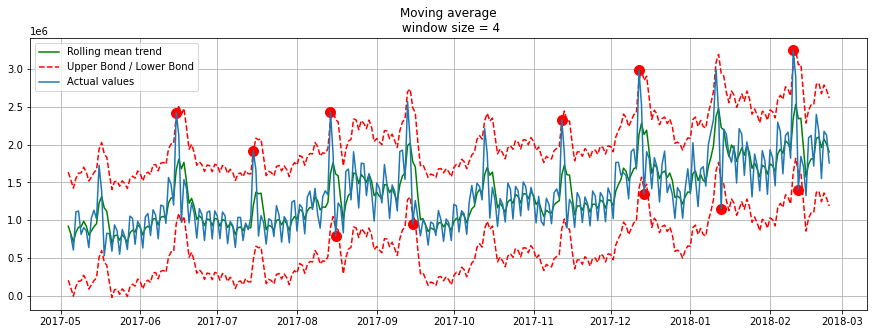

In [59]:
scale = 1.96
rolling_mean = currency.rolling(window=4).mean()
plt.figure(figsize=(15,5))
plt.title("Moving average\n window size = {}".format(4))
plt.plot(rolling_mean, "g", label="Rolling mean trend")
mae = mean_absolute_error(currency[4:], rolling_mean[4:])
deviation = np.std(currency[4:] - rolling_mean[4:])
lower_bond = rolling_mean - (mae + scale * deviation)
upper_bond = rolling_mean + (mae + scale * deviation)
plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
plt.plot(lower_bond, "r--") 

anomalies = pd.DataFrame(index=currency.index, columns=currency.columns)
anomalies[currency<lower_bond] = currency[currency<lower_bond]
anomalies[currency>upper_bond] = currency[currency>upper_bond]
plt.plot(anomalies, "ro", markersize=10)

plt.plot(currency[4:], label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)

#### we can see the downside of our simple approach -- it did not capture the monthly seasonality in our data and marked almost all 30-day peaks as anomalies. If you want to avoid false positives, it is best to consider more complex models.

## Calculate weighted average on the series. Assuming weights are sorted in descending order (larger weights are assigned to more recent observations).

In [60]:
result = 0.0
for n in range(len([0.6, 0.3, 0.1])):
    result += ads.iloc[-n-1] * [0.6, 0.3, 0.1][n]
print(float(result))

87025.5


## Exponential smoothing

### let's see what happens if, instead of weighting the last  k  values of the time series, we start weighting all available observations while exponentially decreasing the weights as we move further back in time.

In [62]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [76]:
def plotExponentialSmoothing(series, alphas):   
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "b", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")

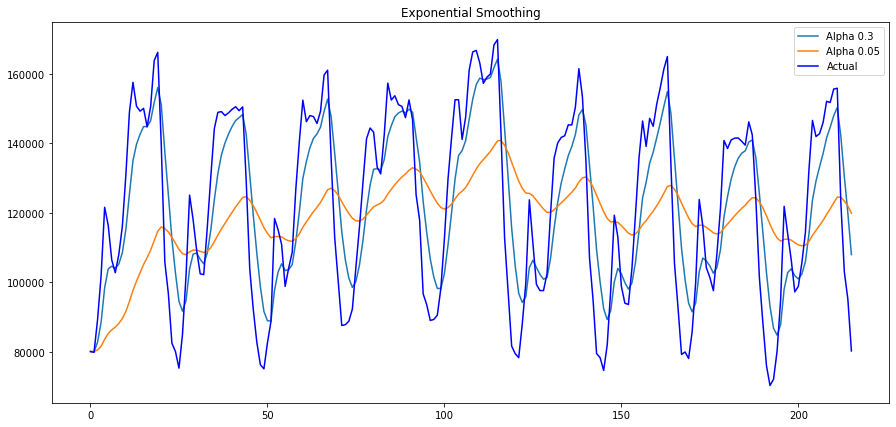

In [77]:
plotExponentialSmoothing(ads.Ads, [0.3, 0.05])

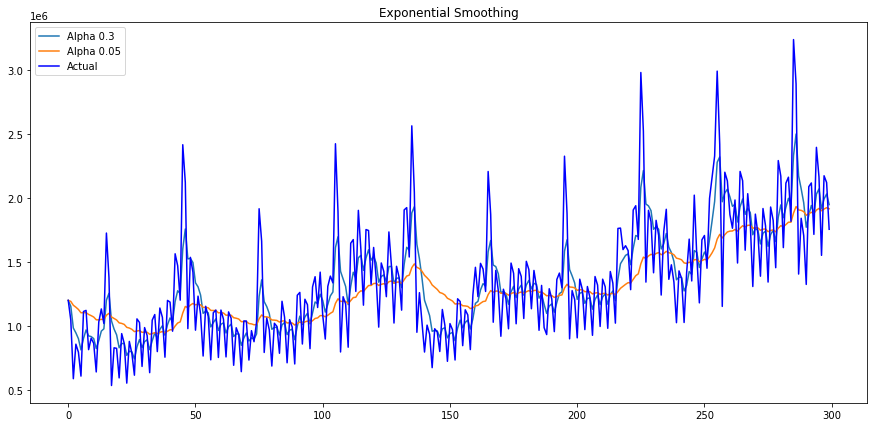

In [78]:
plotExponentialSmoothing(currency.GEMS_GEMS_SPENT, [0.3, 0.05])

#### Up to now, the methods that we've discussed have been for a single future point prediction (with some nice smoothing). That is cool, but it is also not enough. Extend exponential smoothing so that we can predict two future points (of course, we will also include more smoothing with double exponential smoothing next time.).